In [2]:
import os
import random
import matplotlib.pyplot as plt


from PIL import Image, ImageFile


In [3]:
CAT_IMAGE_PATH = "../data/cats"

# Count breeds images

In [12]:
def print_folder_stats(root_path):
    sub_folders = os.listdir(root_path)
    
    
    total_examples = 0
    class_sizes = {}
    for class_ in sub_folders:
        examples = os.listdir(root_path + f"/{class_}")
        total_examples += len(examples)
        class_sizes[class_] = len(examples)

    print(f"We have {len(sub_folders)} classes")
    print()
    
    print(f"total examples: {total_examples}")
    print()
    
    for class_, size in sorted(class_sizes.items(), key=lambda x:x[1], reverse=True):
        print(f"\t{class_}: {size}")

In [13]:
print_folder_stats(CAT_IMAGE_PATH)

We have 68 classes

total examples: 33302

	Tabby: 1000
	Tiger: 1000
	No cat: 1000
	Calico: 1000
	Dilute Calico: 1000
	Himalayan: 1000
	Bombay: 1000
	Bengal: 1000
	Dilute Tortoiseshell: 1000
	Ragdoll: 1000
	Manx: 1000
	Tortoiseshell: 1000
	Maine Coon: 1000
	Domestic Long Hair: 1000
	American Shorthair: 1000
	Torbie: 1000
	Siamese: 1000
	Persian: 1000
	Snowshoe: 1000
	Russian Blue: 1000
	Tuxedo: 1000
	Domestic Medium Hair: 1000
	Extra-Toes Cat - Hemingway Polydactyl: 1000
	Domestic Short Hair: 1000
	American Bobtail: 991
	Turkish Van: 815
	Turkish Angora: 750
	Norwegian Forest Cat: 580
	British Shorthair: 567
	Oriental Short Hair: 491
	Exotic Shorthair: 471
	Scottish Fold: 380
	Burmese: 344
	Egyptian Mau: 305
	Tonkinese: 260
	Abyssinian: 255
	Balinese: 254
	Birman: 227
	Sphynx - Hairless Cat: 209
	Siberian: 189
	Havana: 184
	Munchkin: 181
	Cornish Rex: 171
	American Curl: 149
	Nebelung: 148
	Applehead Siamese: 135
	Ragamuffin: 134
	Japanese Bobtail: 127
	Devon Rex: 119
	Ocicat: 118
	Pix

**I shrinked dataset with max 1000 images per class.**

# Quick look at examples

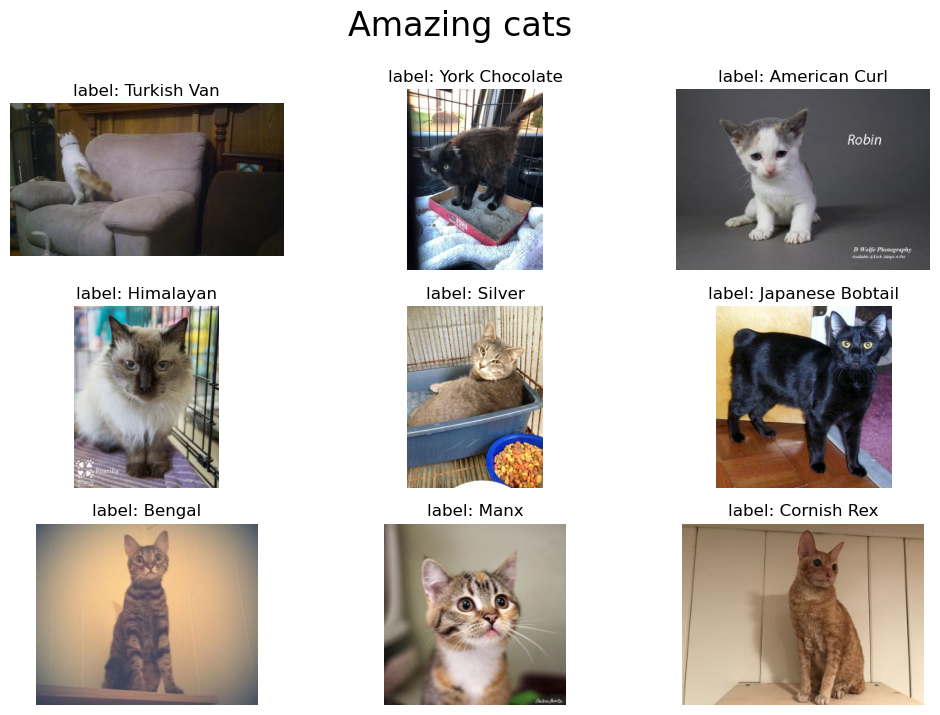

In [16]:
plt.figure(figsize=(12,8))
plt.suptitle("Amazing cats", size=24)
random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

Images are not clear, and this is good. We can sent user photos to it

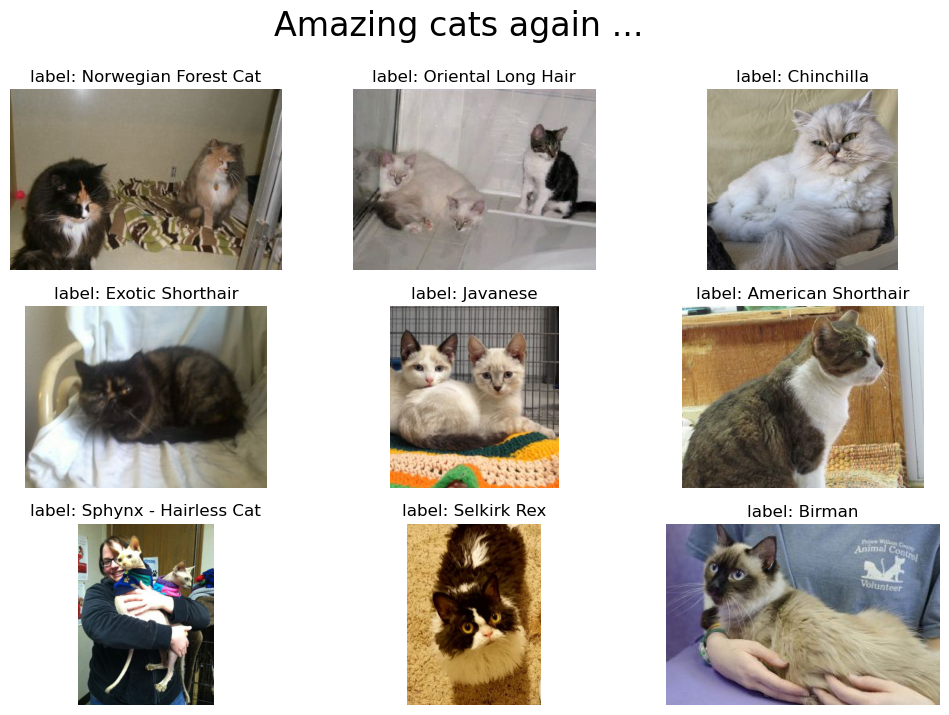

In [15]:
plt.figure(figsize=(12,8))
plt.suptitle("Amazing cats again ...", size=24)

random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

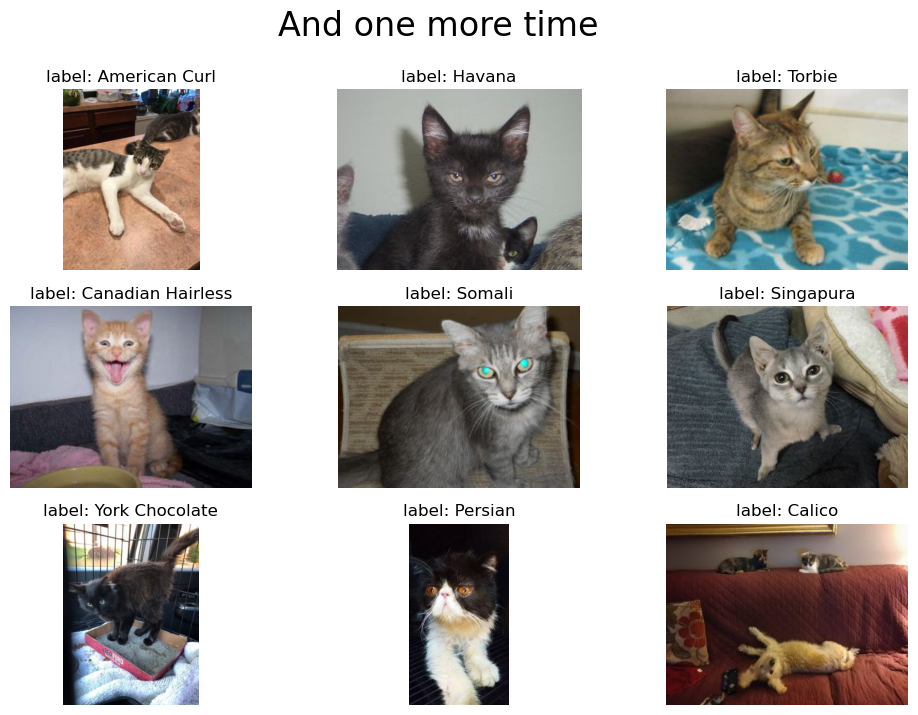

In [17]:
plt.figure(figsize=(12,8))
plt.suptitle("And one more time ", size=24)

random_breeds = random.choices(breeds, k=9)
for index, breed in enumerate(random_breeds):
    images = os.listdir(CAT_IMAGE_PATH + '/' + breed)
    image_path = random.sample(images, k=1)
    im = Image.open(CAT_IMAGE_PATH + '/' + breed + "/" + image_path[0])
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: '+breed)
    plt.axis('off')
plt.show()

# Let's have a look on a non-cat images
But is's may be not so fun

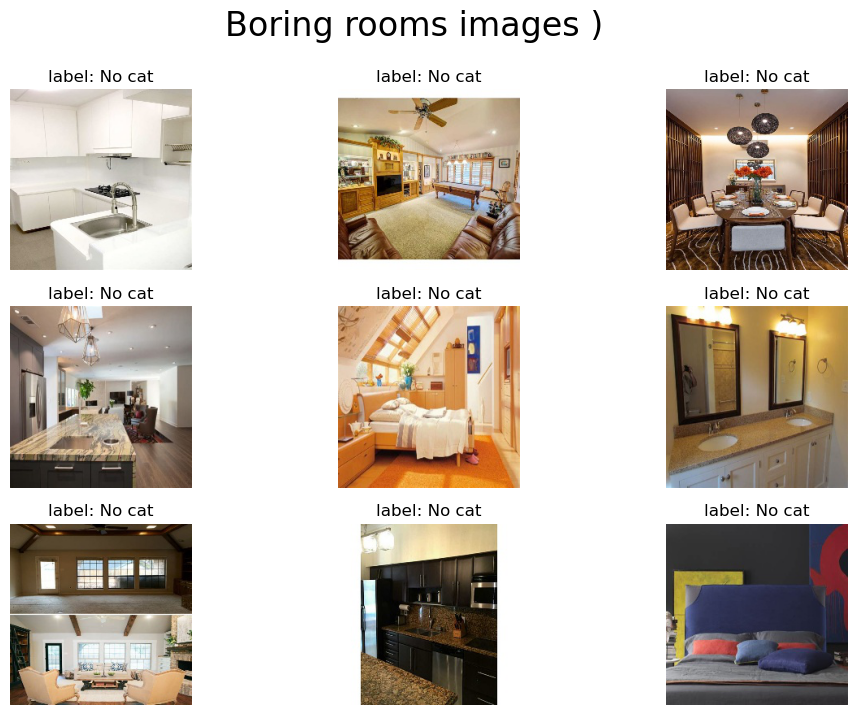

In [32]:
plt.figure(figsize=(12,8))
plt.suptitle("Boring rooms images )", size=24)

no_cats_folder = os.path.join(CAT_IMAGE_PATH, "No cat")
no_cats_images = os.listdir(no_cats_folder)
random_rooms = random.choices(no_cats_images, k=9)
for index, path in enumerate(random_rooms):
    im = Image.open(os.path.join(no_cats_folder, path))
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('label: No cat')
    plt.axis('off')
plt.show()

# Takeaways

- It's a guite interesting dataset with amazing cats
- It's guite coplicated, because cats are very similar, and it would be hard to detect right breed
- We can try different augmentations, to help model detect right breed